## Digit Recognizer
Learn computer vision fundamentals with the famous MNIST data     
Kaggle source: https://www.kaggle.com/c/digit-recognizer/overview

**Competition Description**

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

**Practice Skills**

Computer vision fundamentals including simple neural networks
Classification methods such as SVM and K-nearest neighbors

### Summary
Data Exploration
- [Display One of Each Digit](#one_digit)
- [Digits' Label Distribution](#distribution)
- [Best Match for Chosen Samples](#samples)
- [Binary Comparison Between the Digits 0 and 1 including ROC Curve](#binary)

Model Exploration
- [kNN Model with Cross Validation](#knn)
- [MLP Model](#mlp)

In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

#### Data Loading

In [2]:
#load data
train_data = genfromtxt('train.csv', delimiter = ',', skip_header = 1)
test_data = genfromtxt('test.csv', delimiter = ',', skip_header = 1)

In [4]:
print(train_data.shape[:],test_data.shape[:])

(42000, 785) (28000, 784)


In [5]:
# for train data the first column is each digit's corresponding label
print(train_data[:5])

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### <a id = "one_digit">Display One of Each Digit </a>

In [5]:
labels = train_data[:,0]
#get unique list of digits label
digits = list(set(labels))

In [6]:
digits

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [7]:
loc = []
for d in digits:
    loc.append(np.where(labels == d)[0][0])

In [8]:
#get indexes of digits from 0 to 9
loc

[1, 0, 16, 7, 3, 8, 21, 6, 10, 11]

Digit: 0


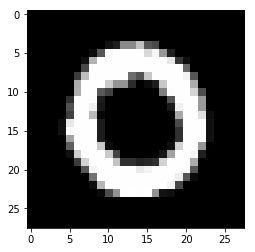

Digit: 1


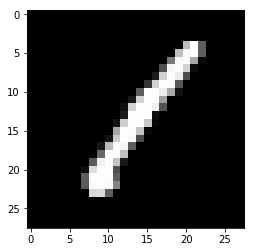

Digit: 2


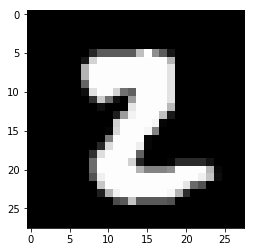

Digit: 3


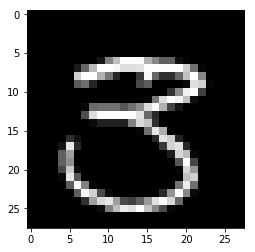

Digit: 4


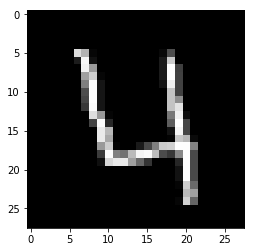

Digit: 5


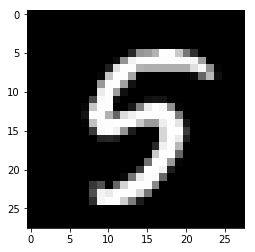

Digit: 6


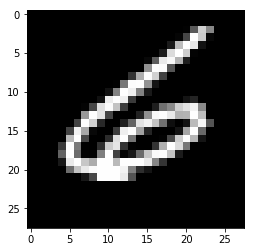

Digit: 7


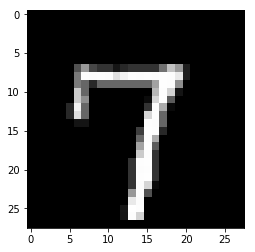

Digit: 8


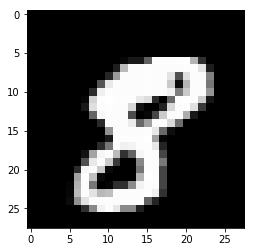

Digit: 9


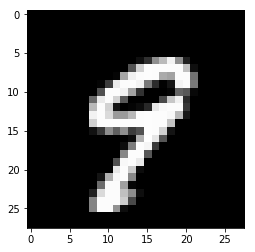

In [9]:
for i in range(len(loc)):
    print("Digit:",i)
    digit = train_data[loc[i]][1:].reshape(28,28)
    plt.imshow(digit, cmap = 'gray')
    plt.show()

####  <a id = "distribution"> Normalized Distribution of Digits' Labels</a>
all digits label are evenly distributed

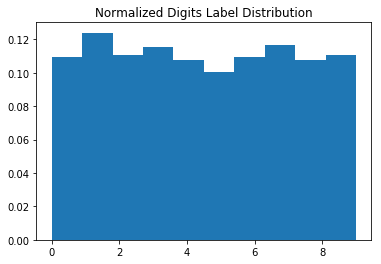

In [10]:
plt.hist(labels, density = 1);
plt.title("Normalized Digits Label Distribution");

#### <a id="samples">Best Match for Chosen Samples</a>     
For each sample digit from 0 to 9, **compute and show the best match (nearest neighbor) between the chosen sample and the rest of the training data**. Use L2 distance between the two images’ pixel values as the metric.
- sample digit 3: best match is a 5 at position 8981. **This is an erroneous example**

In [3]:
images = train_data[:,1:]

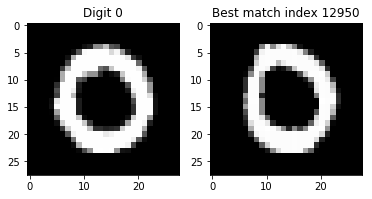

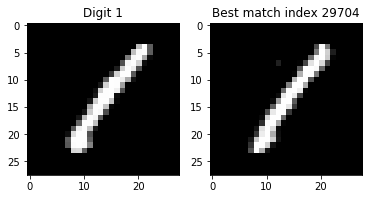

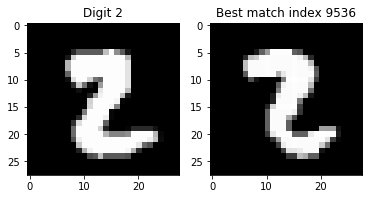

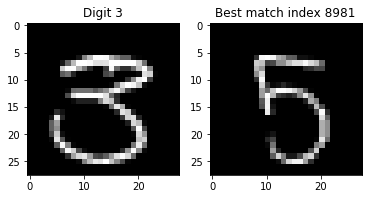

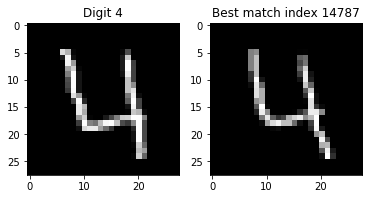

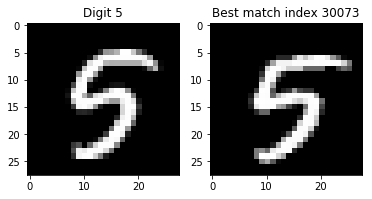

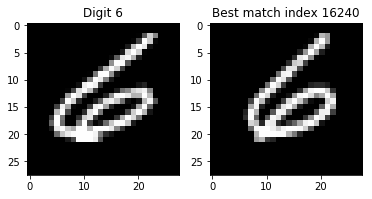

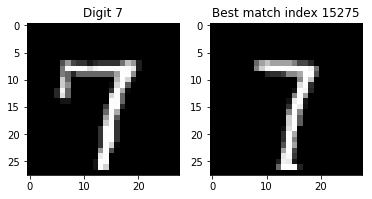

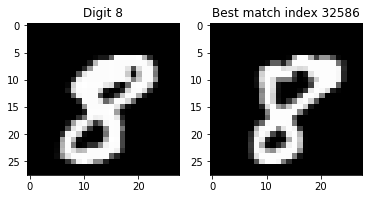

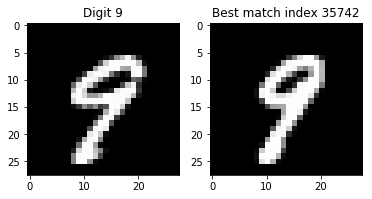

In [11]:
images = train_data[:,1:]

for d,idx in enumerate(loc):
    min_index = 22
    min_dist = np.linalg.norm(images[22]- images[idx])
    for i in range(len(images)):
        #if it looks up the distance from itself to itself, skip
        if i == idx: 
            continue;
        dist = np.linalg.norm(images[i]- images[idx])
        if dist < min_dist:
            min_dist = dist
            min_index = i
    #plot original digit vs its best match's
    fig,axs = plt.subplots(1,2)
    original = train_data[idx][1:].reshape(28,28)
    match = train_data[min_index][1:].reshape(28,28)
    axs[0].imshow(original, cmap = 'gray');
    axs[0].title.set_text("Digit {}".format(d));
    axs[1].imshow(match, cmap = 'gray');
    axs[1].title.set_text("Best match index {}".format(min_index));
#     fig.show();

#### <a id ="binary">Binary Comparison Between the Digits 0 and 1</a>    
Using **L2 norm to compute the pairwise distances** for all genuine matches and all impostor matches, and plot histograms of the genuine and impostor distances on the same set of axes.

In [12]:
labels = train_data[:,0]
zero_one = [] 
genuine  = []
imposter = []
label_binary = []

for lb in range(len(labels)):
    if labels[lb] == 0 or labels[lb] == 1:
        zero_one.append(train_data[lb])
        label_binary.append(labels[lb])
zero_one = np.array(zero_one)
print(zero_one.shape[:])

(8816, 785)


In [13]:
np.shape(np.square(zero_one[0,1:]-zero_one[1,1:]))

(784,)

In [14]:
np.sum(np.square(zero_one[0,1:] - zero_one[1,1:]))

10940474.0

In [26]:
for i in range(0,len(zero_one)):
    for j in range(i+1,len(zero_one)): 
        # comparing the newdata with our standard
        dist = np.sqrt(np.sum(np.square(zero_one[i,1:] - zero_one[j,1:]),axis=-1))
        digit_number = j #j is the index in zero_one
    #Check if they are genuine or imposter
    if  label_binary[i] == label_binary[j]: 
        genuine.append(dist)
    else:
        imposter.append(dist)

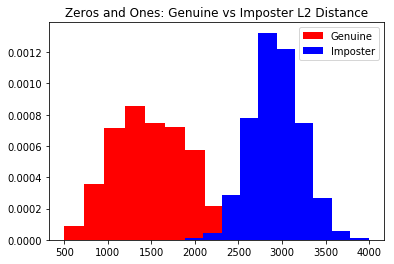

In [48]:
# Norm the number of each digits into [0,1], which is equivelent to probability        
plt.hist(genuine,facecolor = 'red', density = 1,label = "Genuine"); 
# Norm the number of each digits into [0,1], which is equivelent to probability
plt.hist(imposter,facecolor = 'blue', density = 1, label = "Imposter");
plt.title("Zeros and Ones: Genuine vs Imposter L2 Distance");
plt.legend(loc = 'best');

In [78]:
labels = train_data[:,0]
images = train_data[:,1:]
zeros_img = images[labels == 0]
ones_img = images[labels == 1]
#genuine zeros euclidean distance
genuine_zeros = euclidean_distances(zeros_img, zeros_img)
#genuine ones euclidean distance
genuine_ones = euclidean_distances(ones_img, ones_img)
impostor = euclidean_distances(zeros_img, ones_img

Generate an **ROC curve** from the above sets of distances. 

In [88]:
genuine1 = np.array(genuine)
imposter1 = np.array(imposter)
x = []
y = []

cutoff_dis = [x for x in range(2000,3000)]
for c in cutoff_dis:
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in genuine1:
        if i < c:
            tp = tp + 1
        else:
            fn = fn +1
    for k in imposter1:
        if k < c:
            fp = fp+1
        else:
            tn = tn +1
    tpr=tp/(tp+fn)
    fpr=fp/(tn+fp)
    x.append(fpr)
    y.append(tpr)

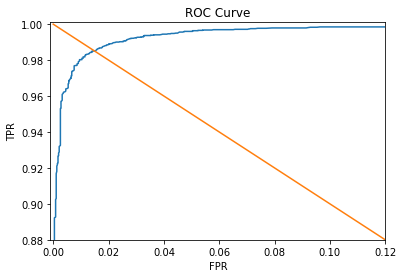

In [75]:
plt.plot(x,y);
plt.plot(np.linspace(0,1,100), np.linspace(1,0,100));
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.xlim([-0.001,0.12]);
plt.ylim([0.88,1.001]);
plt.title("ROC Curve");

### <a id="knn">kNN Model</a>
Implement a **K-NN classifier from scratch**. 

In [94]:
labels = train_data[:,0]
images = train_data[:,1:]

def knn_test(inp, train_data, k):
    dist = np.sqrt(np.sum(np.square(train_data[:,1:] - inp), axis=0))
    temp = np.array(dist)
    temp1 = []
    for i in range(len(temp)):
        temp1.append((temp[i], i))
    temp1.sort()
    indexes = []
    for i in range(k):
        indexes.append(labels[temp1[i][1]])
    s = np.bincount(indexes)
    return np.argmax(s)

In [96]:
#test
print(knn_test(train_data[81,1:],train_data, 3))
print(labels[81]) 

4
4.0


#### kNN: Cross Validation and Predict Test Data Labels

In [23]:
labels = train_data[:,0]
images = train_data[:,1:]

neighbors = list(range(1, 8, 2))
cv_scores = []

# perform 3-fold cross validation
for k in neighbors:
#     print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, images, labels, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

In [33]:
cv_scores


[0.9644047774564767,
 0.9654998761605434,
 0.9642142332407303,
 0.9629047263821384]

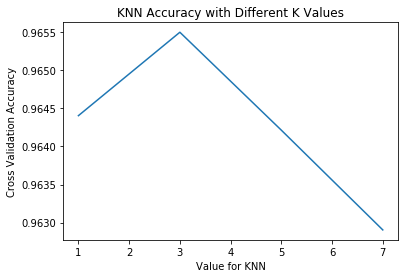

In [25]:
plt.plot(neighbors,cv_scores);
plt.xlabel('Value for KNN');
plt.ylabel('Cross Validation Accuracy');
plt.title('KNN Accuracy with Different K Values');

To avoid overfitting, we should choose **k = 3**

In [26]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

#Fit to the training data
pred_test = knn.fit(images, labels).predict(test_data)

In [28]:
test = pd.read_csv("test.csv", header=0, sep=",")

In [31]:
test['Label'] = pd.Series(pred_test).astype(int)
test['ImageId'] = pd.Series(range(1,len(pred_test)+1))

In [32]:
#export results
test.to_csv('submission.csv', columns=["ImageId","Label"], index=False)

kNN has a public score of 0.96803 on Kaggle

### <a id="mlp">MLP Model</a>
Multi-layer Perceptron

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
#fit on traning data
scaler.fit(train_data[:,1:])  

#apply transformation to train data
X_train = scaler.transform(train_data[:,1:])  

#apply transformation to test data
X_test = scaler.transform(test_data)  

In [35]:
print(X_train.shape[:],X_test.shape[:])

(42000, 784) (28000, 784)


In [36]:
# Multi-layer Perceptron train model.
mlp = MLPClassifier(hidden_layer_sizes=(784,), warm_start=True)

In [37]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(784,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [38]:
#Fit mlp to the training data and predict test data
mlp_pred = mlp.fit(X_train, train_data[:,0]).predict(X_test)

In [40]:
print(mlp_pred.shape[:])

(28000,)


In [41]:
test['Label_mlp'] = pd.Series(mlp_pred).astype(int)
test['ImageId_mlp'] = pd.Series(range(1,len(mlp_pred)+1))

In [48]:
mlp_results = test[['Label_mlp','ImageId_mlp']].copy()
mlp_results.rename(columns = {'Label_mlp':'Label','ImageId_mlp':'ImageId'},inplace = True)

In [50]:
#export results
mlp_results.to_csv('submission_mlp.csv', columns=["ImageId","Label"], index=False)

MLP has a public score of 0.97553 on Kaggle